In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [48]:
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

In [49]:
#Data collection and processing
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv")
df

Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849                0.0         NaN             360.0   
1               4583             1508.0       128.0             360.0   
2               3000                0.0        66.0             360.0   
3               2583             2358.0       120.0             360.0   
4               6000                0.0       141.0             360.0   
..               ...                ...         ...               ...   
609             2900                0.0        71.0             360.0   
610             4106                0.0        40.0             180.0   
611             8072              240.0       253.0             360.0   
612             7583                0.0       187.0             360.0   
613             4583                0.0       133.0             360.0   

     Credit_History Property_Area Loan_Status  
0               1.0         Urban           Y  
1               1.0         Rural           N  
2               1.0         Urban           Y  
3               1.0         Urban           Y  
4               1.0         Urban           Y  
..              ...           ...         ...  
609             1.0         Rural           Y  
610             1.0         Rural           Y  
611             1.0         Urban           Y  
612             1.0         Urban           Y  
613             0.0     Semiurban           N  

[614 rows x 13 columns]

In [50]:
type(df)

pandas.core.frame.DataFrame

In [51]:
df.head()

Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0         Urban           Y  
3             1.0         Urban           Y  
4             1.0         Urban           Y

In [52]:
#number of rows & columns
df.shape

(614, 13)

In [53]:
#statistical measures
df.describe()

ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       614.000000         614.000000  592.000000         600.00000   
mean       5403.459283        1621.245798  146.412162         342.00000   
std        6109.041673        2926.248369   85.587325          65.12041   
min         150.000000           0.000000    9.000000          12.00000   
25%        2877.500000           0.000000  100.000000         360.00000   
50%        3812.500000        1188.500000  128.000000         360.00000   
75%        5795.000000        2297.250000  168.000000         360.00000   
max       81000.000000       41667.000000  700.000000         480.00000   

       Credit_History  
count      564.000000  
mean         0.842199  
std          0.364878  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000

In [54]:
#number of missing values in each column
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [55]:
#dropping the missing values
df=df.dropna()

In [56]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [57]:
#performing encoding
df.replace({'Loan_Status':{'N':0, 'Y':1}}, inplace=True)

In [58]:
df.head()

Loan_ID Gender Married Dependents     Education Self_Employed  \
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   
5  LP001011   Male     Yes          2      Graduate           Yes   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   
5             5417             4196.0       267.0             360.0   

   Credit_History Property_Area  Loan_Status  
1             1.0         Rural            0  
2             1.0         Urban            1  
3             1.0         Urban            1  
4             1.0         Urban            1  
5             1.0         Urban            1

In [59]:
#checking the dependents column values
df['Dependents'].value_counts()

0     274
2      85
1      80
3+     41
Name: Dependents, dtype: int64

In [60]:
#replacing the value of 3+ to 4
df= df.replace(to_replace='3+', value=4)

In [61]:
df['Dependents'].value_counts()

0    274
2     85
1     80
4     41
Name: Dependents, dtype: int64

<AxesSubplot:xlabel='Education', ylabel='count'>

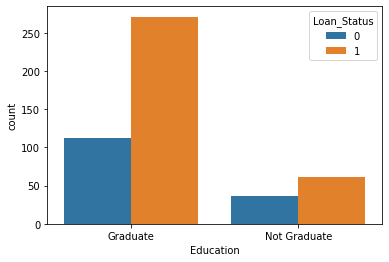

In [62]:
#Data Visualization
#education versus loan status
sns.countplot(x='Education', hue='Loan_Status', data=df)

So we can see that in most of the cases no of loans approved is greater for graduate people but non-graduate people it is less

<AxesSubplot:xlabel='Married', ylabel='count'>

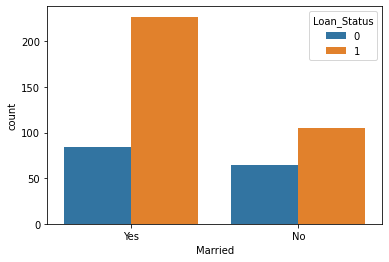

In [63]:
#marital status versus loan status
sns.countplot(x='Married', hue='Loan_Status', data=df)

We can see that Married people have higher chance of loan approval

<AxesSubplot:xlabel='Gender', ylabel='count'>

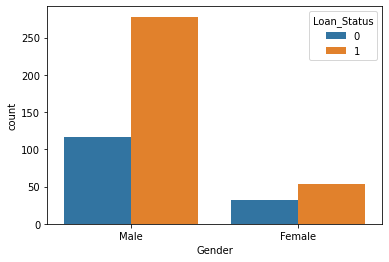

In [64]:
#Gender versus loan status
sns.countplot(x='Gender', hue='Loan_Status', data=df)

Males have higher chances of getting Loan as compared to Female

<AxesSubplot:xlabel='Dependents', ylabel='count'>

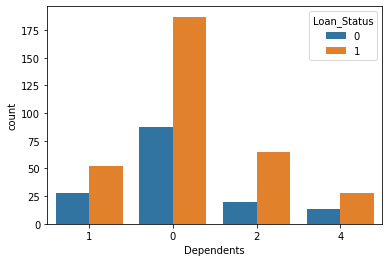

In [65]:
#Dependents versus loan status
sns.countplot(x='Dependents', hue='Loan_Status', data=df)

Lesser the dependents more is the chance of Loan approval

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

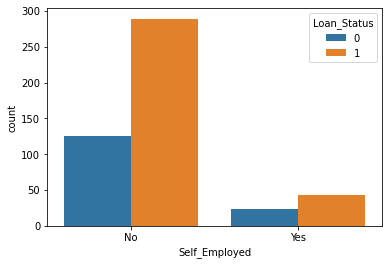

In [66]:
#Self employed versus loan status
sns.countplot(x='Self_Employed', hue='Loan_Status', data=df)

Self employed have very lesser chances of loan approval

<AxesSubplot:xlabel='ApplicantIncome', ylabel='count'>

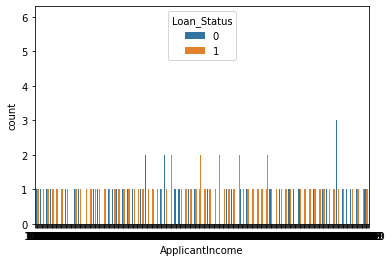

In [67]:
#ApplicantIncome versus loan status
sns.countplot(x='ApplicantIncome', hue='Loan_Status', data=df)

People with less income have very less chance of loan approval

<AxesSubplot:xlabel='LoanAmount', ylabel='count'>

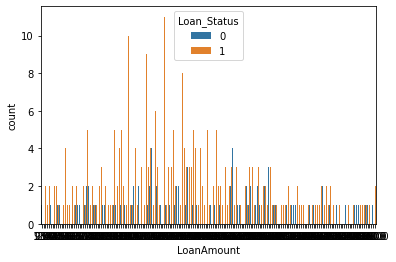

In [68]:
#LoanAmount versus loan status
sns.countplot(x='LoanAmount', hue='Loan_Status', data=df)

Small loan amount results in higher chances of approval

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='count'>

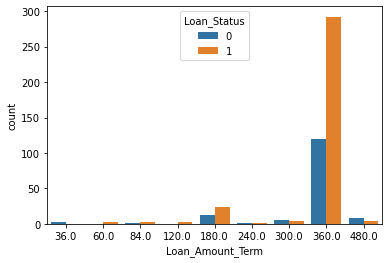

In [69]:
#Loan_Amount_Term versus loan status
sns.countplot(x='Loan_Amount_Term', hue='Loan_Status', data=df)

Loan term 360 has higher chances of approval as compared to other terms

<AxesSubplot:xlabel='Credit_History', ylabel='count'>

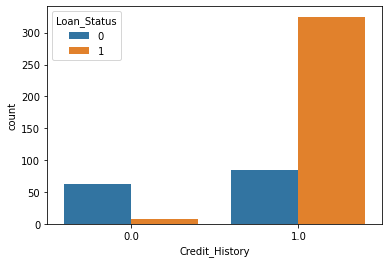

In [70]:
#Credit_History versus loan status
sns.countplot(x='Credit_History', hue='Loan_Status', data=df)

People with good credit history have higher chances of loan approval

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

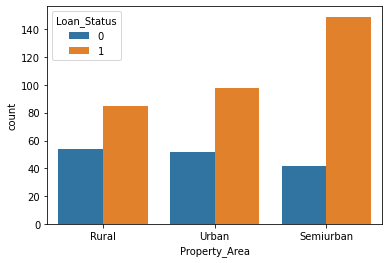

In [71]:
#Property_Area versus loan status
sns.countplot(x='Property_Area', hue='Loan_Status', data=df)

Semi urban people have highest chances of loan approval as compared to urban, rural has the least chance

In [74]:
#converting categorical columns to numerical values
#performing encoding
df.replace({'Married':{'No':0, 'Yes':1},'Gender':{'Male':1, 'Female':0},'Self_Employed':{'No':0, 'Yes':1},
           'Property_Area':{'Rural':0, 'Semiurban':1, 'Urban':2}, 'Education':{'Graduate':1,'Not Graduate':0}}, inplace=True)

In [75]:
df.head()

Loan_ID  Gender  Married Dependents  Education  Self_Employed  \
1  LP001003       1        1          1          1              0   
2  LP001005       1        1          0          1              1   
3  LP001006       1        1          0          0              0   
4  LP001008       1        0          0          1              0   
5  LP001011       1        1          2          1              1   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   
5             5417             4196.0       267.0             360.0   

   Credit_History  Property_Area  Loan_Status  
1             1.0              0            0  
2             1.0              2            1  
3             1.0              2            1  
4             1.0              2            1  
5             1.0              2            1

<AxesSubplot:>

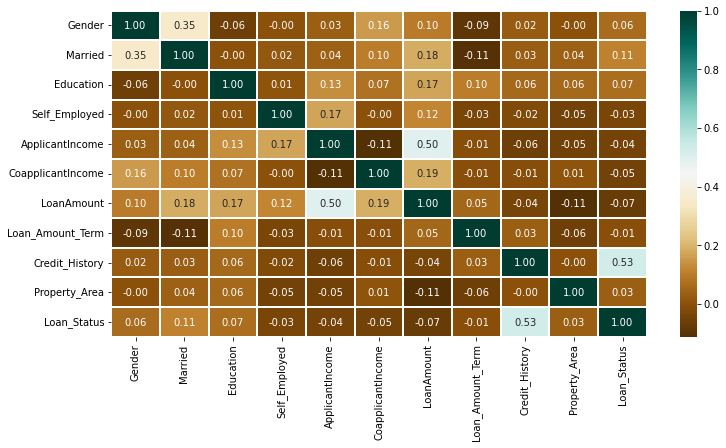

In [76]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), cmap='BrBG', fmt='.2f',
           linewidths=2, annot=True)

The above heatmap is showing the correlation between Loan Amoount and applicant income. It also shows that credit history has high impact on loan status

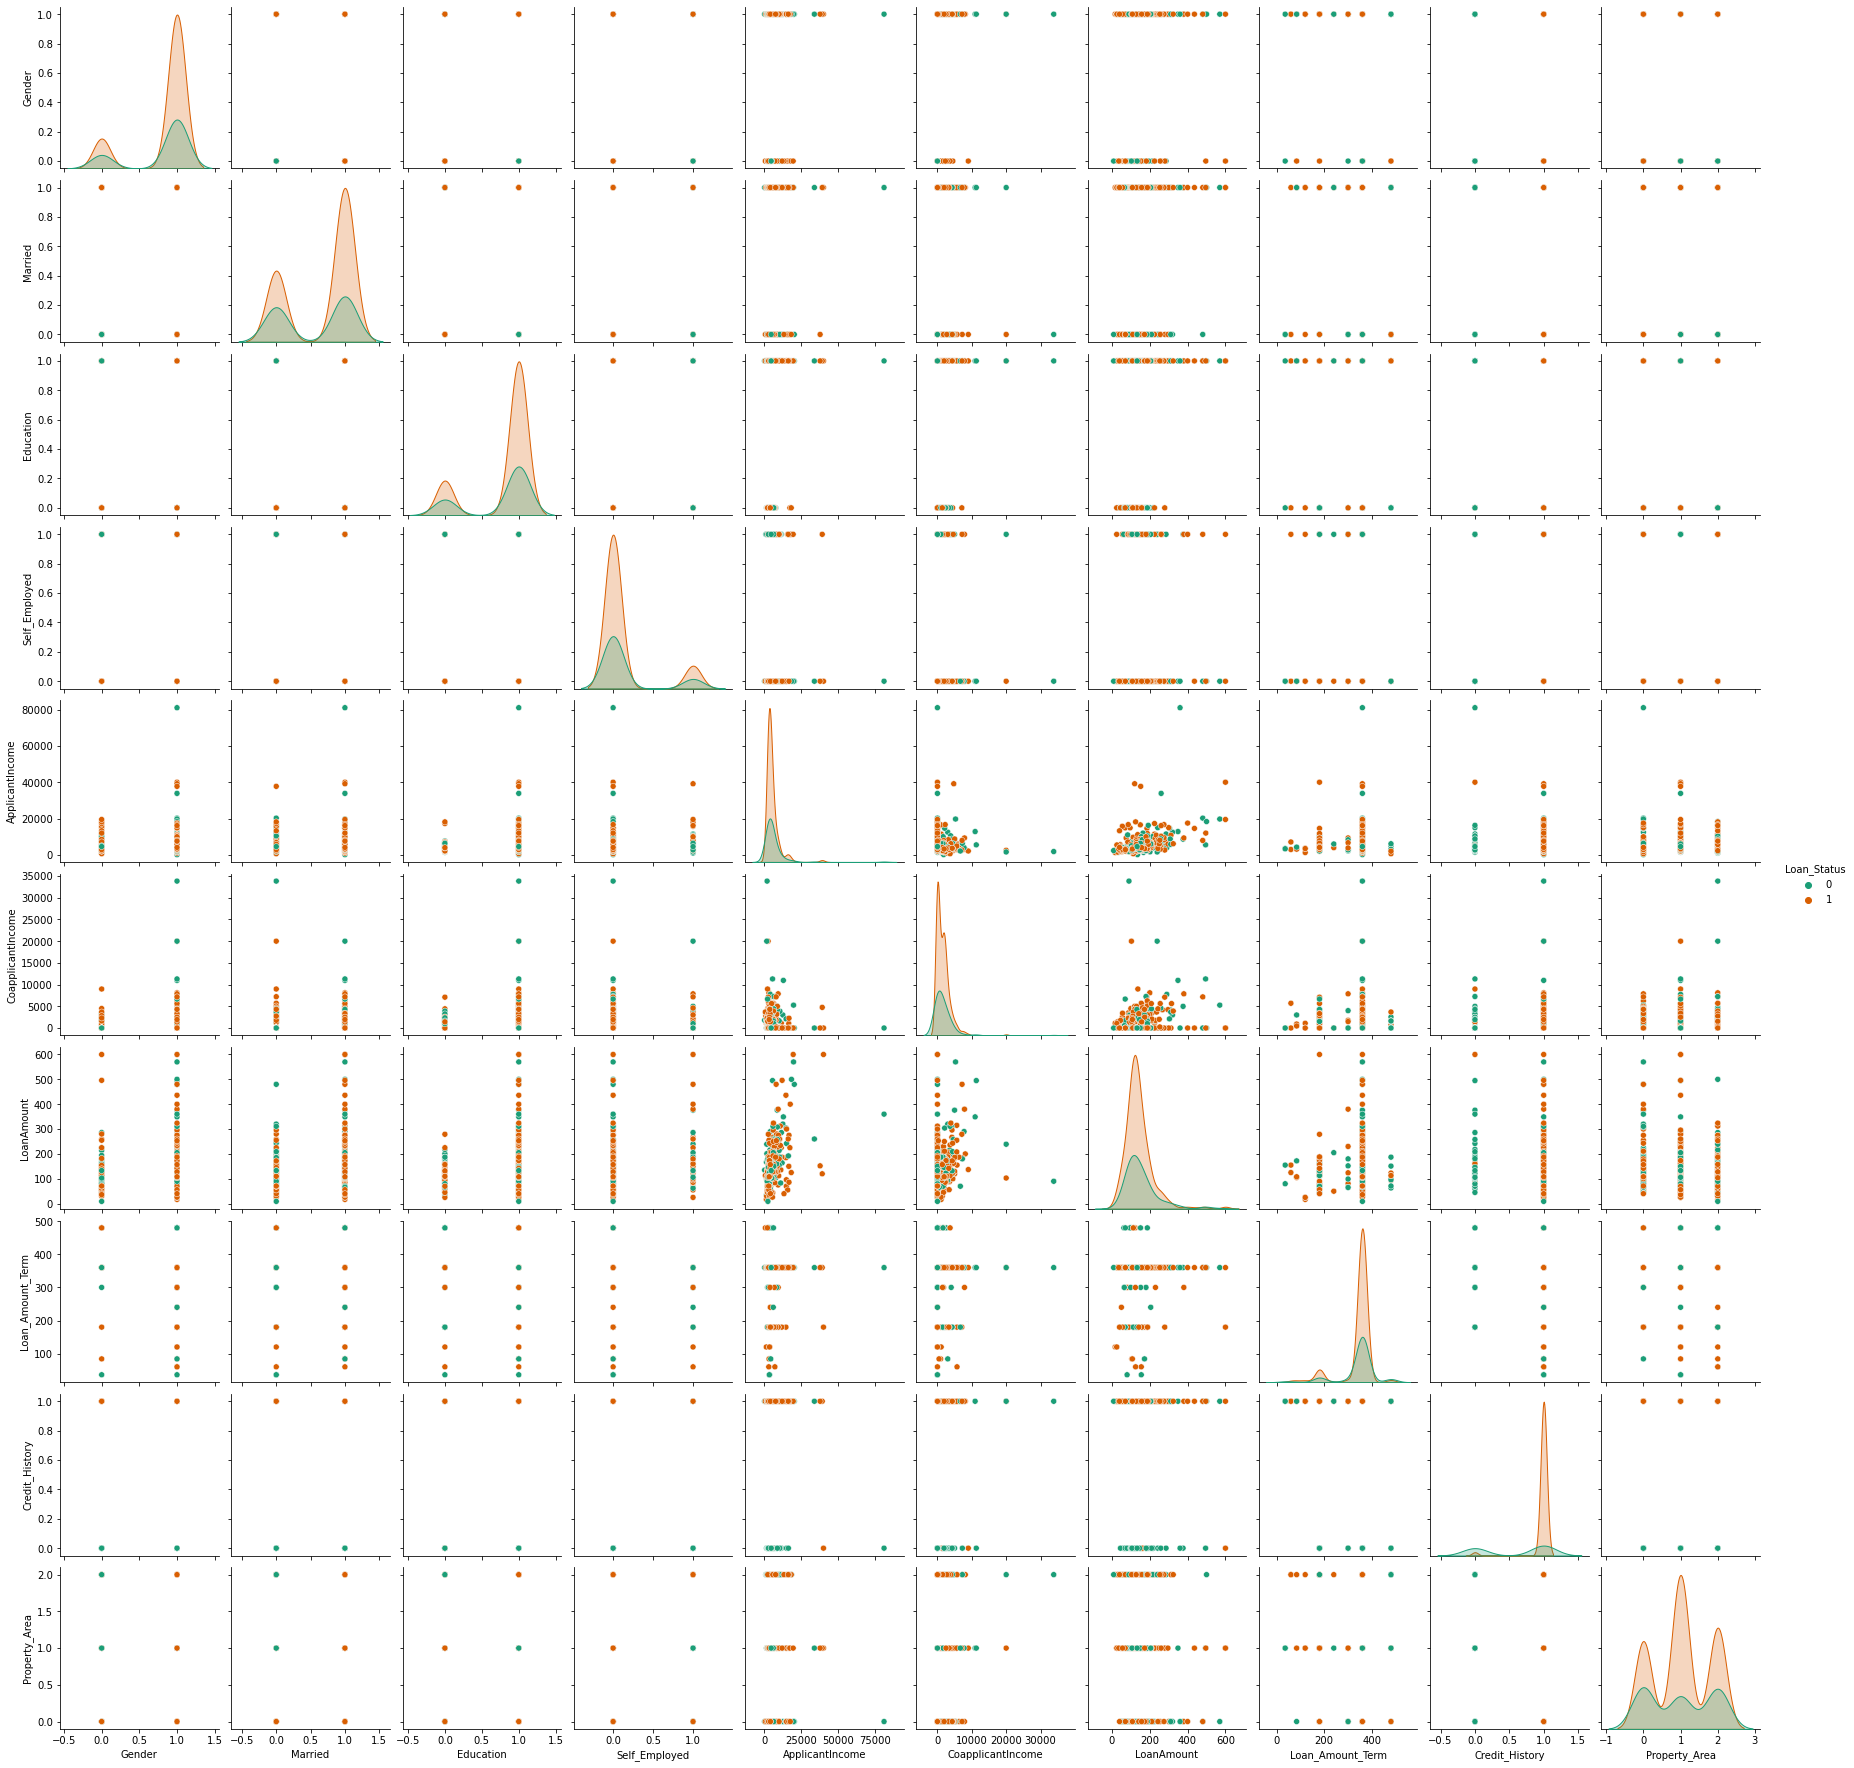

In [77]:
sns.pairplot(df,hue='Loan_Status', palette='Dark2')
plt.show()

In [78]:
#separating the data & label
x=df.drop(columns=['Loan_ID','Loan_Status'], axis=1)
y=df['Loan_Status']

In [79]:
print(x)
print(y)

     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
1         1        1          1          1              0             4583   
2         1        1          0          1              1             3000   
3         1        1          0          0              0             2583   
4         1        0          0          1              0             6000   
5         1        1          2          1              1             5417   
..      ...      ...        ...        ...            ...              ...   
609       0        0          0          1              0             2900   
610       1        1          4          1              0             4106   
611       1        1          1          1              0             8072   
612       1        1          2          1              0             7583   
613       0        0          0          1              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_Hi

In [80]:
#oversampling the data
!pip install imbalanced-learn


In [81]:
from imblearn.over_sampling import SMOTE
SM= SMOTE()
x,y= SM.fit_resample(x,y)


In [82]:
y.value_counts()

0    332
1    332
Name: Loan_Status, dtype: int64

In [83]:
#Modelling
#Finding the best random state
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.30, random_state=i)
    RFR= RandomForestClassifier()
    RFR.fit(x_train, y_train)
    pred=RFR.predict(x_test)
    acc=accuracy_score(y_test, pred)
    if acc>maxAccu:
        maxAccu= acc
        maxRS=i
        
print ('Best accuracy is', maxAccu, 'at random_state', maxRS)

Best accuracy is 0.875 at random_state 77


In [84]:
#creating train test split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.30, random_state= maxRS)

In [85]:
#classificatio algorithms
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve,accuracy_score
from sklearn.model_selection import cross_val_score

In [86]:
RFC= RandomForestClassifier()
RFC.fit(x_train,y_train)
predRFC=RFC.predict(x_test)
pred_train=RFR.predict(x_train)
print (accuracy_score(y_test, predRFC))
print (confusion_matrix(y_test, predRFC))
print (classification_report(y_test, predRFC))

0.845
[[82 22]
 [ 9 87]]
              precision    recall  f1-score   support

           0       0.90      0.79      0.84       104
           1       0.80      0.91      0.85        96

    accuracy                           0.84       200
   macro avg       0.85      0.85      0.84       200
weighted avg       0.85      0.84      0.84       200



In [87]:
#Logistic Regression
LR=LogisticRegression()
LR.fit(x_train,y_train)
predLR=LR.predict(x_test)
pred_train=LR.predict(x_train)
print (accuracy_score(y_test, predLR))
print (confusion_matrix(y_test, predLR))
print (classification_report(y_test, predLR))

0.765
[[72 32]
 [15 81]]
              precision    recall  f1-score   support

           0       0.83      0.69      0.75       104
           1       0.72      0.84      0.78        96

    accuracy                           0.77       200
   macro avg       0.77      0.77      0.76       200
weighted avg       0.77      0.77      0.76       200



In [88]:
#Support Vector Machine Classifier
# checking accuracy for Support Vector Machine Classifier
svc=SVC()
svc.fit(x_train,y_train)
predsvc=svc.predict(x_test)
pred_train=svc.predict(x_train)
print (accuracy_score(y_test, predsvc))
print (confusion_matrix(y_test, predsvc))
print (classification_report(y_test, predsvc))


0.555
[[65 39]
 [50 46]]
              precision    recall  f1-score   support

           0       0.57      0.62      0.59       104
           1       0.54      0.48      0.51        96

    accuracy                           0.56       200
   macro avg       0.55      0.55      0.55       200
weighted avg       0.55      0.56      0.55       200



In [89]:
#checking accuracy for Gradient Boosting Classifier
GB= GradientBoostingClassifier()
GB.fit(x_train,y_train)
predGB=GB.predict(x_test)
print (accuracy_score(y_test, predGB))
print (confusion_matrix(y_test, predGB))
print (classification_report(y_test, predGB))


0.83
[[78 26]
 [ 8 88]]
              precision    recall  f1-score   support

           0       0.91      0.75      0.82       104
           1       0.77      0.92      0.84        96

    accuracy                           0.83       200
   macro avg       0.84      0.83      0.83       200
weighted avg       0.84      0.83      0.83       200



In [90]:
#Cross Validation Score, checking for Random Forest Classifier
from sklearn.model_selection import cross_val_score
score= cross_val_score(RFC,x,y)
print(score)
print(score.mean())
print("Difference between accuracy score and cross validation score is ", accuracy_score(y_test,predRFC) - score.mean())

[0.7518797  0.76691729 0.81954887 0.84210526 0.90151515]
0.8163932558669401
Difference between accuracy score and cross validation score is  0.028606744133059858


In [91]:
# checking cv for Logistic Regression
score= cross_val_score(LR,x,y)
print(score)
print(score.mean())
print("Difference between accuracy score and cross validation score is ", accuracy_score(y_test,predLR) - score.mean())


[0.68421053 0.7518797  0.76691729 0.70676692 0.78787879]
0.7395306447938026
Difference between accuracy score and cross validation score is  0.02546935520619742


In [92]:
# checking cv for Support Vector Machine Classifier
score= cross_val_score(svc,x,y)
print(score)
print(score.mean())
print("Difference between accuracy score and cross validation score is ", accuracy_score(y_test,predsvc) - score.mean())


[0.56390977 0.4887218  0.58646617 0.54135338 0.56060606]
0.5482114376851219
Difference between accuracy score and cross validation score is  0.0067885623148781216


In [93]:
# checking cv for Gradient Boosting Classifier
score= cross_val_score(GB,x,y)
print(score)
print(score.mean())
print("Difference between accuracy score and cross validation score is ", accuracy_score(y_test,predGB) - score.mean())


[0.70676692 0.7518797  0.84210526 0.83458647 0.87121212]
0.8013100934153566
Difference between accuracy score and cross validation score is  0.02868990658464332


Best performing model comes out to be Gradient Boosting Classifier